## Introduction

One of the biggest things to look for when searching for a neighborhood for a future home is how safe it is. Finding a neighborhood with a low amount of crime is better for a person and their family's safety. Living in a home knowing that you and your family is safe leaves people with a peaceful mind contributing to a better quality of life.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
#https://data.wprdc.org/dataset/uniform-crime-reporting-data/resource/044f2016-1dfd-4ab0-bc1e-065da05fca2e 
crime = pd.read_csv("044f2016-1dfd-4ab0-bc1e-065da05fca2e.csv")

crime.head()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651


## Submetric
For this submetric I am going to find out how many crimes have happened in each neighborhood since 2016. To do this I will look at the neighborhood name and then count how many times a neighborhood appears and then put it into a dictionary. 

In [3]:
# Calculating how many crime have happened in each neighborhood
crimeCount = dict()
i = 0
while i < len(crime):
    neighborhood = crime.loc[i,'INCIDENTNEIGHBORHOOD']
    if neighborhood in crimeCount.keys():
        crimeCount[neighborhood] += 1
    else: 
        crimeCount[neighborhood] = 1
    i += 1

print(crimeCount)

{'North Shore': 3424, 'Upper Lawrenceville': 1529, 'Northview Heights': 2462, 'Golden Triangle/Civic Arena': 4278, 'South Side Flats': 17627, 'Elliott': 2407, 'Homewood North': 6134, 'South Side Slopes': 3971, 'Carrick': 10945, 'South Oakland': 2223, nan: 6330, 'Bloomfield': 8150, 'Beechview': 5262, 'Bluff': 4330, 'Strip District': 3140, 'Mount Washington': 7053, 'East Carnegie': 389, 'Crafton Heights': 2611, 'Marshall-Shadeland': 5207, 'East Liberty': 7649, 'East Allegheny': 5569, 'Friendship': 1531, 'Arlington': 1973, 'Central Northside': 786, 'Spring Hill-City View': 2290, 'Brighton Heights': 5810, 'Westwood': 1536, 'East Hills': 4697, 'Brookline': 7130, 'South Shore': 1153, 'Lower Lawrenceville': 2380, 'Bedford Dwellings': 2432, 'Troy Hill-Herrs Island': 252, 'Central Oakland': 4879, 'Garfield': 3250, 'West End': 1162, 'West Oakland': 1809, 'Central Lawrenceville': 4104, 'Lincoln-Lemington-Belmar': 6272, 'Sheraden': 5596, 'Beltzhoover': 1928, 'Outside City': 2041, 'Squirrel Hill So

In [9]:
sort = dict(sorted(crimeCount.items(), key=lambda item: item[1]))
df = pd.DataFrame.from_dict(sort.items())
print(df)

                            0      1
0             Mt. Oliver Boro     94
1     Mt. Oliver Neighborhood    117
2              Outside County    226
3      Troy Hill-Herrs Island    252
4                   Ridgemont    282
..                        ...    ...
94                  Shadyside   8038
95                 Bloomfield   8150
96                    Carrick  10945
97  Central Business District  17353
98           South Side Flats  17627

[99 rows x 2 columns]


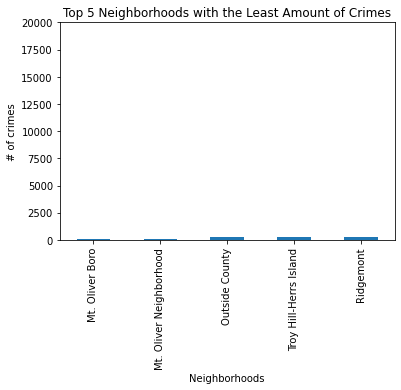

In [35]:
df.groupby(0)[1].sum().nsmallest(5).plot(kind = "bar", ylim = (0, 20000), xlabel = "Neighborhoods", ylabel = "# of crimes", title = "Top 5 Neighborhoods with the Least Amount of Crimes")

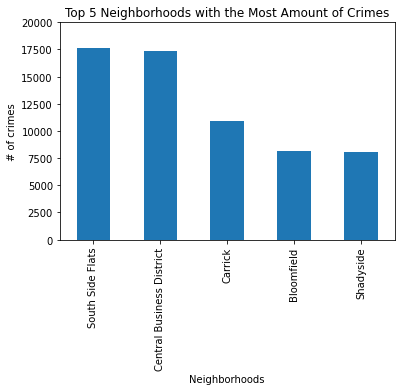

In [36]:
df.groupby(0)[1].sum().nlargest(5).plot(kind ="bar", ylim = (0, 20000), xlabel = "Neighborhoods", ylabel = "# of crimes", title = "Top 5 Neighborhoods with the Most Amount of Crimes")

## Conclusion
As seen from the graphs there is a large difference between number of crimes between the neighborhoods.
The 5 neighborhoods with least amount of crimes in order are:
1. Mt. Oliver Boro
2. Mt. Oliver Neighborhood
3. Outside County
4. Troy Hill-Herrs Island
5. Ridgemont

These 5 are the best when it comes to fewest amounts of crime.